<a href="https://colab.research.google.com/github/sammyamajumdar/my_website/blob/main/Assignment4_q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
STUDENT_ID = ""

---

MTH765P - Coursework 4 
This is a template notebook for the last coursework assignment for MTH765P,
Closely follow the instructions in this template in order 
to complete the assessment and to obtain full marks. Please only
modify cells where you are instructed to do so. Failure to comply
may result in unexpected errors that can lead to mark deductions.

Author: Primoz Skraba


As usual, we begin by loading the necessary libraries. You should not 
import any other libraries.

In [ ]:
import sqlite3 
import pandas as pd
import numpy as np

## Question 1 (30 points): 

-----------------------------------------


a.)  **(10 points)** Create a sqlite database called **nanoim.db** with the following tables.
- All numbers should be integers
- IDs should be the primary key
- All other entries should be of type TEXT

Be sure to close the table once you have created it. 

<h1><center>Movies</center></h1>

|MovieID  | Movie |Actor |Director|
|  :--:|  :----: |  :----:| :----:|
|1 | Idiocracy| 1 |4|
|2 | Predator |2 |1|
|3 | The Room |4  |2|
|4 | Point Break  |3 | 3 |


<h1><center>Actors</center></h1>

|ActorID  | Name | Rank|
|  :--:|  :----: |  :----:|
|1 |Terry Crews|3|
|2 | Arnold Schwarzenegger |2|
|3 |Keanu Reeves | 1 |
|4 |Tommy Wiseau |4|


<h1><center>Directors </center></h1>

|DirectorID  | Name |
|  :--:|  :----: | 
|1 |John McTiernan| 
|2 |Tommy Wiseau|
|3 |Kathryn Bigelow |
|4 |Mike Judge|





In [ ]:
# cursors: allows traversal, retrieval and manipulation of records in in a database
# transaction: an unit of work in a database management system

In [ ]:
# YOUR CODE HERE

con = sqlite3.connect('nanoim.db')
cur = con.cursor()

cur.execute('''CREATE TABLE Movies
                (MovieID integer PRIMARY KEY autoincrement, 
                Movie text, 
                Actor integer, 
                Director integer)''')


cur.execute("INSERT INTO Movies VALUES (1, 'Idiocracy', 1, 4 )")
cur.execute("INSERT INTO Movies VALUES (2, 'Predator', 2, 1 )")
cur.execute("INSERT INTO Movies VALUES (3, 'The Room', 4, 2 )")
cur.execute("INSERT INTO Movies VALUES (4, 'Point Break', 3, 3 )")


# to print out the table 

# cur.execute(''' SELECT * FROM Movies ''')
# print(cur.fetchall())


con.commit()
con.close()




# raise NotImplementedError()


In [ ]:
con_table2 = sqlite3.connect('nanoim.db')
cur = con_table2.cursor()
cur.execute('''CREATE TABLE Actors
                (ActorID integer PRIMARY KEY, 
                Name text, 
                Rank integer)''')

cur.execute("INSERT INTO Actors VALUES (1, 'Terry Crews', 3)")
cur.execute("INSERT INTO Actors VALUES (2, 'Arnold Schwarzenegger', 2)")
cur.execute("INSERT INTO Actors VALUES (3, 'Keanu Reeves', 1)")
cur.execute("INSERT INTO Actors VALUES (4, 'Tommy Wiseau', 4)")


con_table2.commit()
con_table2.close()

In [ ]:
con_table3 = sqlite3.connect('nanoim.db')
cur = con_table3.cursor()
cur.execute('''CREATE TABLE Directors
                (DirectorID integer PRIMARY KEY,
                 Name text)''')

cur.execute("INSERT INTO Directors VALUES (1, 'John McTiernan')")
cur.execute("INSERT INTO Directors VALUES (2, 'Tommy Wiseau')")
cur.execute("INSERT INTO Directors VALUES (3, 'Kathryn Bigelow')")
cur.execute("INSERT INTO Directors VALUES (4, 'Mike Judge')")


con_table3.commit()
con_table3.close()

----------------
----------------

b) (2 Point) Reconnect with **nanoim.db** in a connection named _conn_

----------------

In [ ]:
# YOUR CODE HERE

conn = sqlite3.connect('nanoim.db')

# raise NotImplementedError()

For the rest of this question you will construct SQL queries and run them.
- Make sure to store the result in the variable name given
- Make queries so that they would work if the tables are expanded or updated. 
- Use only sqlite3 functions 

---------
---------

c.) **(5 Points)** Create a following query to return names of the actors who are ranked 3rd or higher (**The highest rank is 1**). Store the result in a variable called _actors_

---------

In [ ]:
# YOUR CODE HERE

curr = conn.cursor()
curr.execute(''' SELECT Name from Actors WHERE rank BETWEEN 1 AND 3 ''')
actors = curr.fetchall()
for actor in actors: 
    print(actor[0])

# raise NotImplementedError()

Terry Crews
Arnold Schwarzenegger
Keanu Reeves


---------
---------

d.) **(6 Points)** Create a following query to return the name of movies starring Keanu Reeves. Store the result in a variable called _keanu_

---------

In [ ]:
# YOUR CODE HERE

curr.execute('''
                
                SELECT Movies.Movie 
                FROM Movies
                JOIN Actors
                ON Movies.Actor = Actors.ActorID
                WHERE Name = 'Keanu Reeves'

                ''')
keanu = curr.fetchall()
print(keanu[0][0])

# raise NotImplementedError()

Point Break


---------
---------

e.) **(6 Points)** Create a following query to return the directors of movies starring Tommy Wiseau. Store the result in a variable called _tommy_

---------

In [ ]:
# YOUR CODE HERE

curr.execute('''
              SELECT Directors.Name
              FROM Directors
              WHERE Directors.DirectorID in
                (SELECT Movies.Director 
                FROM Movies
                JOIN Actors
                ON Movies.Actor = Actors.ActorID 
                WHERE Name = 'Tommy Wiseau')

                ''')
tommy = curr.fetchall()
print(tommy[0][0])

# raise NotImplementedError()

Tommy Wiseau


----------
----------
f) **(1 Point)** Close the connection.

----------

In [ ]:
# YOUR CODE HERE

conn.close()

#raise NotImplementedError()

## Question 2 (30 Points)
------------

We will connect to the database given in the file **music.db**. This database has quite a large
number of tables. We will deal with the following tables which have the following
columns.
- album: album id, title, artist id
- artist: artist id, name
- genre: genre id, name
- track: track id, name, album id, media type id, genre id, composer, milliseconds, bytes, unit price

In [ ]:
m_conn = sqlite3.connect('music.db')

--------------
--------------
a.) **(6 points)** Construct a query which lists the  albums  Red Hot Chili Peppers have in the database and put it into variable called _rhcp_

--------------

In [ ]:
# YOUR CODE HERE

cursor = m_conn.cursor()
cursor.execute('''

              SELECT album.title
              FROM album
              WHERE album.artist_id in
              (SELECT artist.artist_id 
              FROM artist
              WHERE artist.name = 'Red Hot Chilli Peppers')


               ''')


rhcp = cursor.fetchall()
print(rhcp)

# raise NotImplementedError()

[]


--------------
--------------
b.) **(6 points)** Construct a query which lists  all the tracks on the album Achtung Baby and store the result in a variable called _u2_

--------------

In [ ]:
# YOUR CODE HERE

cursor.execute(''' 

                
                SELECT track.name
                FROM track
                WHERE track.album_id IN
                (SELECT album.album_id
                FROM album
                WHERE album.title = 'Achtung Baby')


              ''')

u2 = cursor.fetchall()
for track in u2:
    print(track[0])

# raise NotImplementedError()


Zoo Station
Even Better Than The Real Thing
One
Until The End Of The World
Who's Gonna Ride Your Wild Horses
So Cruel
The Fly
Mysterious Ways
Tryin' To Throw Your Arms Around The World
Ultraviolet (Light My Way)
Acrobat
Love Is Blindness


--------------
--------------

c.) **(8 points)** Construct a query which returns how much it would cost to buy all Metallica songs to the nearest pound and store it in a variable called _rockon_
- You should assume the track costs are in pounds

---------------

In [ ]:
# YOUR CODE HERE

cursor.execute('''

                SELECT ROUND(SUM(track.unit_price)) 
                FROM track
                WHERE track.album_id  IN
                (SELECT album.album_id
                FROM album
                WHERE album.artist_id IN
                (SELECT artist.artist_id
                FROM artist
                WHERE artist.name = 'Metallica'))


               ''')

rockon = cursor.fetchall()
print(rockon[0][0])
# raise NotImplementedError()

111.0


--------------
--------------

d.) **(10 points)** Construct a query which returns the name and the length of the longest Rock song and transforms it in seconds (to the nearest second) and stores the name in a variable called _longsong_ and the length in a variable called _time_

---------------

In [ ]:
query = ''' SELECT track.name, track.milliseconds/1000
            FROM track
            WHERE track.milliseconds IN (
                SELECT MAX(track.milliseconds) AS 'longest_track'
                FROM track
                WHERE track.genre_id IN (
                    SELECT genre.genre_id
                    FROM genre
                    WHERE genre.name = 'Rock' 
                )
            )  ''' 

cursor.execute(query)
x = cursor.fetchall()
longsong = x[0][0]
time = x[0][1]
print(longsong, time)

Dazed And Confused 1612


In [ ]:
m_conn.close()

## Question 3 (30 Points)
------------


We will connect to the database given in the file **eateries.sqlite**. This database has health inspection violations for San Francisco stored in 3 tables
- 'businesses'
- 'inspections'
- 'violations'

The cell below will print out the columns of the tables as pandas dataframes so you can examine them and then construct the queries. Unless otherwise stated you must only use SQL to get full marks. 

In [ ]:
# This will open the connection
# and print out the tables

# the function takes as input the Cursor_Object and 
# returns the table in form of pd.DataFrame()
def sql_to_frame(cu):
    data = cu.fetchall()
    data = list(list(x) for x in data)
    dataColumns = [column[0] for column in cu.description]
    df = pd.DataFrame(data, columns=dataColumns)
    return df 


e_conn = sqlite3.connect('eateries.sqlite')
c = e_conn.cursor()
table_list =['businesses','inspections','violations']
for t in table_list:
    print(t)
    c.execute(f"PRAGMA table_info({t});")
    display(sql_to_frame(c))

businesses


,cid,name,type,notnull,dflt_value,pk
0,0,business_id,INTEGER,1,None,0
1,1,name,VARCHAR(64),0,None,0
2,2,address,VARCHAR(50),0,None,0
3,3,city,VARCHAR(23),0,None,0
4,4,postal_code,VARCHAR(9),0,None,0
5,5,latitude,FLOAT,0,None,0
6,6,longitude,FLOAT,0,None,0
7,7,phone_number,BIGINT,0,None,0
8,8,TaxCode,VARCHAR(4),0,None,0
9,9,business_certificate,INTEGER,0,None,0


inspections


,cid,name,type,notnull,dflt_value,pk
0,0,business_id,TEXT,1,None,0
1,1,Score,INTEGER,0,None,0
2,2,date,TEXT,1,None,0
3,3,type,VARCHAR(33),1,None,0


violations


,cid,name,type,notnull,dflt_value,pk
0,0,business_id,TEXT,1,None,0
1,1,date,TEXT,1,None,0
2,2,ViolationTypeID,TEXT,1,None,0
3,3,risk_category,TEXT,1,None,0
4,4,description,TEXT,1,None,0


-----------
-----------

a.) **(6 points)** How many restaurants do not have a precise geographic location given. Store the number (and only the number) in a variable called _locations_.

------------


In [ ]:
# YOUR CODE HERE
c.execute(''' 
            SELECT COUNT(businesses.business_id)
            FROM businesses
            WHERE businesses.longitude IS NULL OR businesses.latitude IS NULL
            ''')

locations = c.fetchall()
print(locations[0][0])
# raise NotImplementedError()

3153


In [ ]:
c.execute(''' SELECT date FROM inspections ''')
c.fetchall()



-----------
-----------

b.)  **(8 points )** How many spellings of San Francisco are there? (You can assume that all variations count including modifiers such as north, south, east, west) also refer to San Francisco. **You can obtain the result through visual inspection**. Store the number in a variable called _SF_

------------


In [ ]:
# YOUR CODE HERE


c.execute('''SELECT businesses.city, businesses.owner_city
            FROM businesses
            GROUP BY city
             ''')
c.fetchall()
# SF, S.F., SAN FRANCISCO, S.S.F.
# raise NotImplementedError()


-----------
-----------

c.) **(16 points)**  Create a histogram plot of the Inspection Scores for January 2014. 
- Here you should use the function _sql_to_frame()_ which takes a query and returns a pandas dataframe.
- Remove any null values
------------


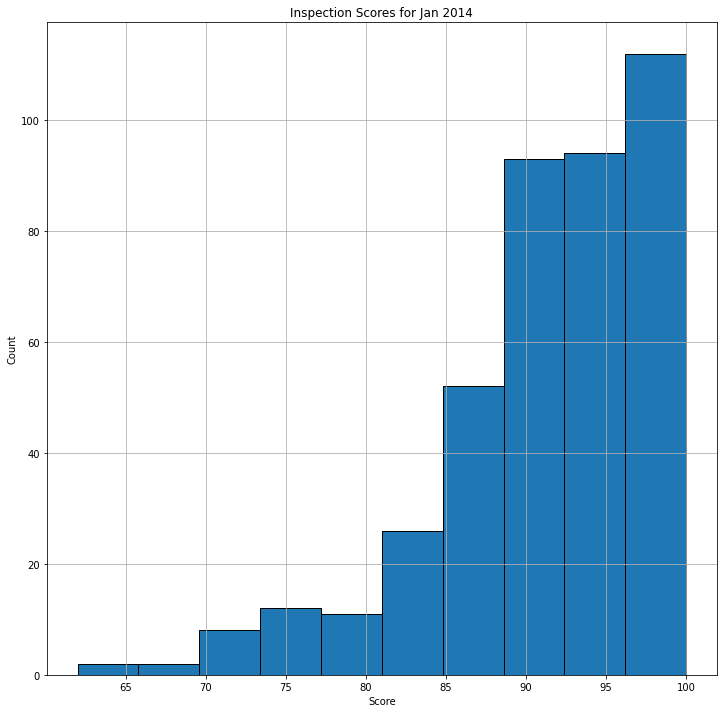

In [103]:
# YOUR CODE HERE

c.execute(''' SELECT inspections.Score, inspections.date
              FROM inspections
              WHERE (inspections.date BETWEEN '20140101' AND '20140131')
              ''')

scores = sql_to_frame(c)
scores = scores.dropna()
# scores
hist = scores.hist(ec='k', figsize=(12,12))
for ax in hist.flatten():
    ax.set_xlabel('Score')
    ax.set_ylabel('Count')
    ax.set_title('Inspection Scores for Jan 2014')
# raise NotImplementedError()